## Map the Cell Type Data to the UMAP data

This allows for comparing cell types to unassigned genes

In [2]:
# Check the version of anndata we are using
import anndata as ad
import pandas as pd
ad.__version__

'0.8.0'

In [3]:
# Load the h5ad file
ad_worm_aging = ad.read("./input_data/ad_worm_aging.h5ad")
ad_worm_aging

AnnData object with n_obs × n_vars = 47423 × 20305
    obs: 'n_counts', 'n_genes', 'timepoint', 'annotate_name'
    var: 'gene_ids', 'gene_names', 'gene_class', 'n_counts', 'n_cells'
    uns: 'timepoint_colors'
    obsm: 'X_umap', 'scvi'
    layers: 'denoised'

In [4]:
# Load observations into it own variable
# OBSERVED OUTPUT: obs contains: 'n_counts', 'n_genes', 'timepoint', 'annotate_name'
obs_df = ad_worm_aging.obs
obs_df

,n_counts,n_genes,timepoint,annotate_name
TCTTGCGAGTCCTGCG-1-TC2_d11_1,53587.0,619,d11,41_2:marginal cells
GCTACAAGTGTGGTCC-1-TC2_d11_1,52800.0,253,d11,41_1:NA pharyngeal epithelium
TGGGAAGTCGGCTTGG-1-TC2_d11_1,43280.0,1459,d11,41_2:marginal cells
AAGTGAACAACCGACC-1-TC2_d11_1,31445.0,1140,d11,41_1:NA pharyngeal epithelium
GTAGCTAAGCTACGTT-1-TC2_d11_1,30088.0,1476,d11,78_0:pharyngeal gland cell
...,...,...,...,...
TCAGGTACAGACAATA-1-TC2_d8_2,283.0,190,d8,34_1:PH socket
CTGTAGACATTGCTGA-1-TC2_d8_2,315.0,221,d8,52_0:RMD motor neurons
CGTGATAGTACACTCA-1-TC2_d8_2,271.0,183,d8,3_0:germline
GTTCATTAGCGCCATC-1-TC2_d8_2,261.0,134,d8,7_0:vulval muscle


In [5]:
# Create a category type list 
# for categories you can use the full cell type name or a partial name to collect common cell types
def timepoint_cat(row, timepoints):
    ret_val='NA'
    if row['timepoint'] in timepoints:
        ret_val=row['timepoint']
    return ret_val

# Add category column to obs_df
timepoints = ['NA','d1','d3','d5','d8','d11','d15']
for index in range(1,8):
    print(index)
    obs_df[timepoints[index-1]] = obs_df.apply(lambda row: timepoint_cat(row, timepoints[:index]), axis=1)


1
2
3
4
5
6
7


In [6]:
obs_df

,n_counts,n_genes,timepoint,annotate_name,NA,d1,d3,d5,d8,d11,d15
TCTTGCGAGTCCTGCG-1-TC2_d11_1,53587.0,619,d11,41_2:marginal cells,NA,NA,NA,NA,NA,d11,d11
GCTACAAGTGTGGTCC-1-TC2_d11_1,52800.0,253,d11,41_1:NA pharyngeal epithelium,NA,NA,NA,NA,NA,d11,d11
TGGGAAGTCGGCTTGG-1-TC2_d11_1,43280.0,1459,d11,41_2:marginal cells,NA,NA,NA,NA,NA,d11,d11
AAGTGAACAACCGACC-1-TC2_d11_1,31445.0,1140,d11,41_1:NA pharyngeal epithelium,NA,NA,NA,NA,NA,d11,d11
GTAGCTAAGCTACGTT-1-TC2_d11_1,30088.0,1476,d11,78_0:pharyngeal gland cell,NA,NA,NA,NA,NA,d11,d11
...,...,...,...,...,...,...,...,...,...,...,...
TCAGGTACAGACAATA-1-TC2_d8_2,283.0,190,d8,34_1:PH socket,NA,NA,NA,NA,d8,d8,d8
CTGTAGACATTGCTGA-1-TC2_d8_2,315.0,221,d8,52_0:RMD motor neurons,NA,NA,NA,NA,d8,d8,d8
CGTGATAGTACACTCA-1-TC2_d8_2,271.0,183,d8,3_0:germline,NA,NA,NA,NA,d8,d8,d8
GTTCATTAGCGCCATC-1-TC2_d8_2,261.0,134,d8,7_0:vulval muscle,NA,NA,NA,NA,d8,d8,d8


In [7]:
## Print the color palate for TABLEAU_COLORS
#import matplotlib.colors as mcolors
#print(mcolors.TABLEAU_COLORS)

In [8]:
# Map the categories from above to the UMAP 
X_umap = ad_worm_aging.obsm['X_umap']
X_umap_df = pd.DataFrame(X_umap, columns = ['X','Y'])

# Add the category to the X_umap_df
obs_df.reset_index(drop=True, inplace=True)

timepoints = ['NA','d1','d3','d5','d8','d11','d15']
for timepoint in timepoints:
    X_umap_df = X_umap_df.join(obs_df[timepoint])
    
print(X_umap_df) 

               X          Y  NA  d1  d3  d5  d8  d11  d15
0      11.996049  -4.528540  NA  NA  NA  NA  NA  d11  d11
1      11.966536  -4.563943  NA  NA  NA  NA  NA  d11  d11
2      12.137930  -4.606019  NA  NA  NA  NA  NA  d11  d11
3      12.171188  -4.609626  NA  NA  NA  NA  NA  d11  d11
4       1.208974  -5.466276  NA  NA  NA  NA  NA  d11  d11
...          ...        ...  ..  ..  ..  ..  ..  ...  ...
47418   6.838445  -4.121013  NA  NA  NA  NA  d8   d8   d8
47419  13.993632  10.459724  NA  NA  NA  NA  d8   d8   d8
47420   8.334566  -3.902491  NA  NA  NA  NA  d8   d8   d8
47421  14.051341  -5.063011  NA  NA  NA  NA  d8   d8   d8
47422   2.027979 -14.025132  NA  NA  NA  NA  d8   d8   d8

[47423 rows x 9 columns]


In [9]:
X_umap_df['NA'].value_counts()

NA    47423
Name: NA, dtype: int64

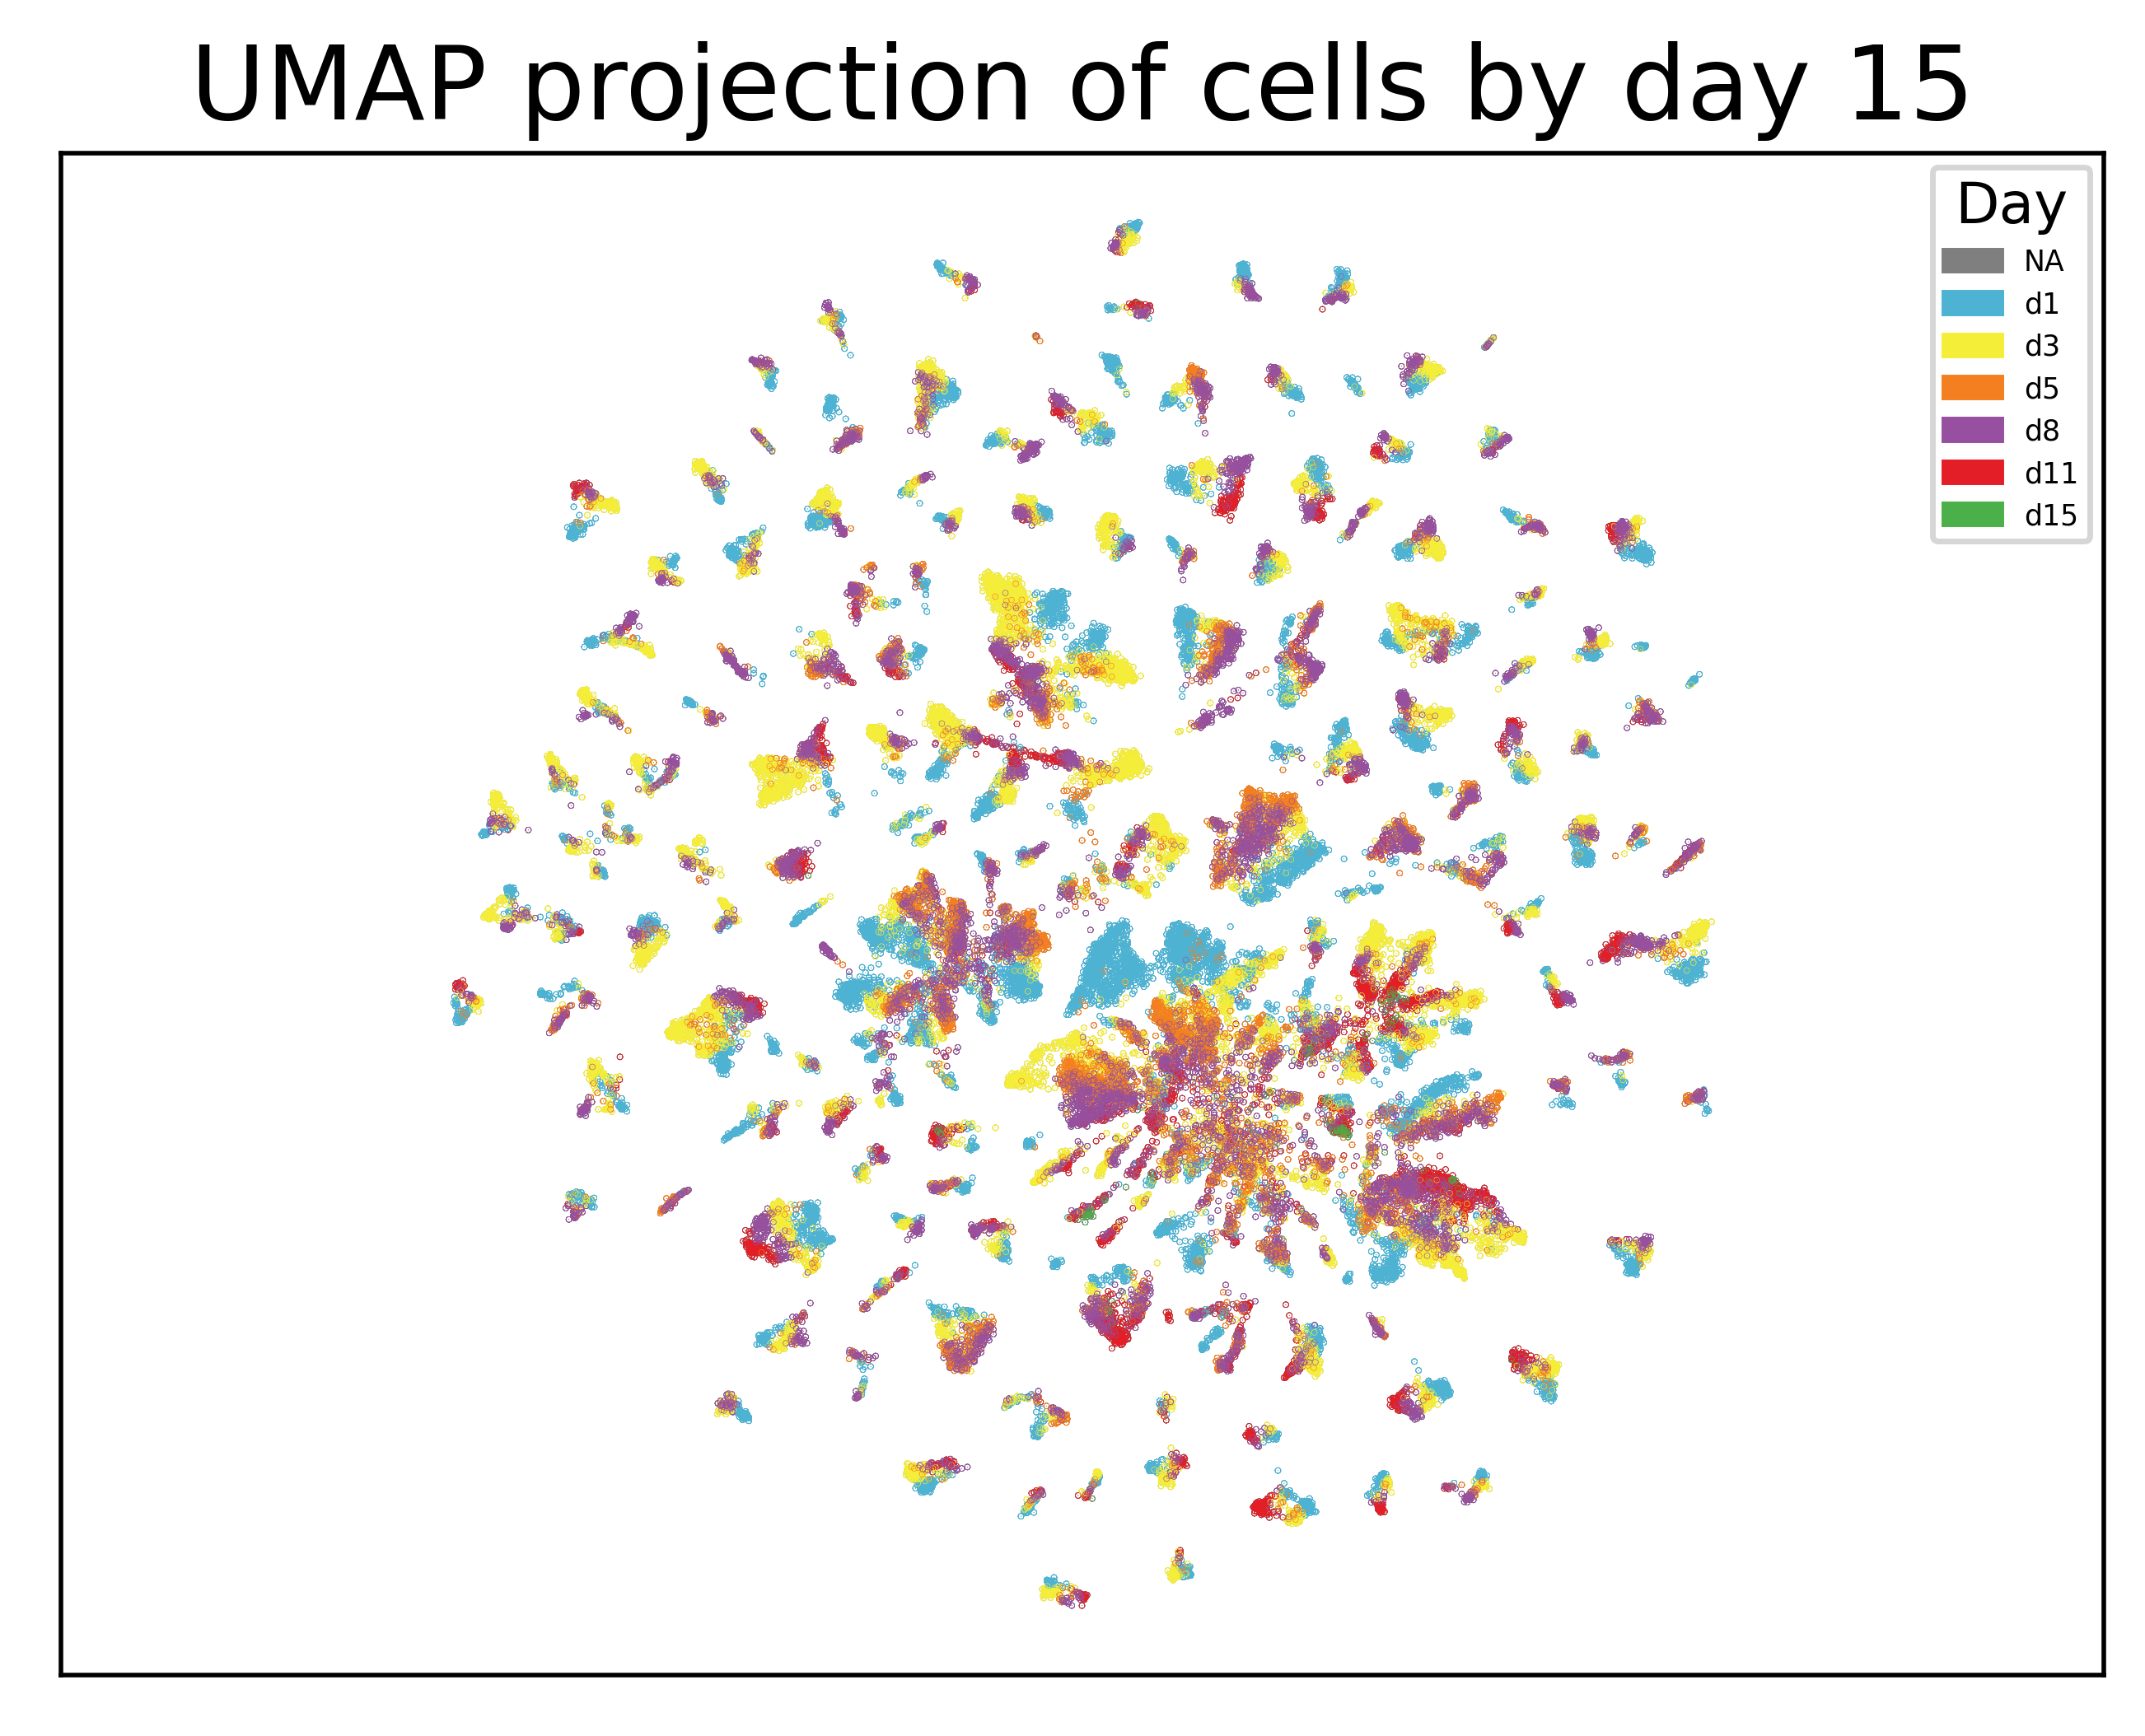

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np
%matplotlib inline

output_dir = './output_data'
def plot_timepoint(X_umap_df, timepoint):
    # Create a color map
    colors = {'NA':'#7f7f7f','d1':'#4eb3d3','d3':'#f5ee39','d5':'#f47f20','d8':'#97509f','d11':'#e41e26','d15':'#4bb049'}
    plt.rcParams['figure.dpi'] = 500
    sss = plt.scatter(X_umap_df['X'],X_umap_df['Y'], c=X_umap_df[timepoint].map(colors), s=.008)
    plt.gca().set_aspect('equal', 'datalim')

    day = timepoint[1:] if timepoint[0]=='d' else 0
    plt.title(f'UMAP projection of cells by day {day}', fontsize=18);
    plt.yticks([])
    plt.xticks([])

    patches = [ mpatches.Patch(color=colors[key], label=key) for key in colors.keys()]
    plt.rcParams["legend.fontsize"] = 5
    legend = plt.legend(handles=patches)
    legend.set_title('Day')

    plt.savefig(f'{output_dir}/day_{int(day):02}.png')

timepoints = ['NA','d1','d3','d5','d8','d11','d15']
for timepoint in timepoints: 
    plot_timepoint(X_umap_df, timepoint)


In [12]:
!convert -delay 5 ./output_data/day_*.png ./output_data/umap_age.gif

In [13]:
%%bash

# Replace file name with the name of file to be resized
file_nm='umap_top_15_cell_categories.png'
pic_size=`identify -format "%[fx:w]x%[fx:h]" ${file_nm}`

if [[ "${pic_size}" == "3200x2400" ]]; then
    echo image ${pic_size} resized
    convert ${file_nm} -resize 40% tmp_${file_nm}
    mv tmp_${file_nm} ${file_nm}
else
    echo image already resized ${pic_size}
fi

identify: unable to open image 'umap_top_15_cell_categories.png': No such file or directory @ error/blob.c/OpenBlob/3569.


image already resized


In [ ]:
# # Trying an alternative way to draw the scatter plot
# # Create a color map
# colors = {'other':'#7f7f7f', 'neuron':'#1f77b4', 'muscle':'#9467bd', 'hypodermis':'#d62728'}

# fig, ax = plt.subplots()
# grouped = X_umap_df.groupby('category')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='X', y='Y', s=.008, label=key, color=colors[key])
# plt.show()